## E02 : Adversarial Search (Minimax)

In [1]:
import copy
import math
import numpy as np
from classes.Color import Color
from classes.Game import TicTacToe
from IPython.display import display
from classes.HumanPlayer import HumanPlayer
from classes.SmartComputerPlayer import SmartComputerPlayer

GAME_DIMS = (3,3)

#### **2.01:** Apply Backtracking to Binary Tree

Para el siguiente grafo, utilizando backtracking determine la ruta  
con la cual se alcanza el estado meta representado por el nodo  
$X_{G} = M$, considere que el estado de inicio es $X_{I} = A$  

#### **2.02:** Minimax Tree

Considere un juego que tiene cuatro estados finales y los caminos para alcanzar el estado final van desde la raíz hasta las cuatro hojas de un árbol binario perfecto, como se muestra en la figura.

<img src="../imgs/e2.02_tree.jpeg" alt="Árbol de Juego" width=200 height=200>
  
Supongamos que usted es el jugador que maximiza y tiene la primera oportunidad de mover, es decir, esta en la raíz y su oponente en el siguiente nivel.  
  
- ¿Qué movimiento haría como jugador maximizador considerando que su oponente también juega de manera óptima?

**Solution:**  

$max\;(min (3,5),\;min(2,9))$ 

#### **2.03:** Implement Minimax Algorithm

In [ ]:
inputs = [[3,5,2,9],
        [3,5,2,9,12,5,23,23],
        [-1,4,2,6,-3,-5,0,7]]

def pairwise(iterable):
    a = iter(iterable)
    return zip(a, a)

def minmax(terminals:np.ndarray) -> np.int32:
    levels = int(np.log2(len(terminals)))
    if levels == 1: return np.max(terminals)
    elif levels % 2 == 0:
        return minmax(np.array([np.minimum(a,b) for a,b in pairwise(terminals)]))
    else:
        return minmax(np.array([np.maximum(a,b) for a,b in pairwise(terminals)]))

if __name__ == "__main__":
    for i in range(len(inputs)):
        print(f"Test Input #{i}")
        print(f"{minmax(inputs[i])}\n")

#### **2.04:** Implement `initial_state()` functions for Tic-Tac-Toe Board

1) Implementar en Google Colab la función `initial_state()`. La cual  
establece $S_{0}$, el **estado inicial**, que especifica la configuración inicial del  
juego (en nuestro caso, un tablero vacío de ($3 \times 3$). La función debe  
regresar una lista $3 \times 3$ con contenido `'None'` en cada elemento.
  
2) Implementar en Google Colab una función para desplegar la información  
del tablero (estado actual) en forma gráfica utilizando: Matplotlib,  
Pygame, Tkinter, OpenCV, etc.

In [ ]:
board = TicTacToe((3,3))
print(f"{Color.BOLD}TicTacToe State (Array){Color.END}: \n{board.state}")
board.board

In [ ]:
move = np.array([0,1])
board.make_move(move)
board.update_board(move)
display(board.board)

In [ ]:
# Reset board
board.init_state()
display(board.board)

#### **E2.05**: Implement `Player(s)` and `Actions(s)` methods.

1) Implementar en Google Colab la función `Player(s)`.  
La cual regresa a que jugador `(X o O)` le toca mover  
dado el estado $s$.
  
2) Implementar en Google Colab la función `Actions(s)`.  
La cual regresa un conjunto de acciones legales (qué  
lugares están libres) dado un estado $s$.

In [ ]:
b = TicTacToe(GAME_DIMS)
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f"ACTIONS:\n{b.actions()}")
display(b.board)

In [ ]:
# X's Move 1
b.make_move(np.array([2,2]))
b.update_board(np.array([2,2]))
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f"ACTIONS:\n{b.actions()}")
display(b.board) 

In [ ]:
# O's Move 1
b.make_move(np.array([1,2]))
b.update_board(np.array([1,2]))
print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if b.player() == "X" else Color.RED} {b.player()}{Color.END}')
print(f"ACTIONS:\n{b.actions()}")
display(b.board) 

##### **Reproduce Game with Random Moves**

In [ ]:
def random_game():
    # Create TicTacToe TicTacToe
    b = TicTacToe(GAME_DIMS)
    # Game continues while there are None values on the board
    while (np.any(b.state == None)):
        # Get available actions for player in turn
        U = b.actions()
        player = b.player()
        print(f'PLAYER IN TURN: {Color.BOLD}{Color.BLUE if player == "X" else Color.RED} {player}{Color.END}')
        print(f'ACTIONS FROM TURN {b.ply}:\n{U}')
        
        # Randomly selects one action from action space
        z = U[np.random.choice(U.shape[0], size=1, replace=False), :] 

        # Execute selected move
        b.make_move(z)
        winner = b.winner()
        print(f"MOVE PLAYED: {z.flatten()}")
        print(f"WINNER: {winner} ")
        print(f'IS TERMINAL: {b.is_terminal()}')
        print(f"UTILITY: {b.utility()}")
        display(b.board)
        if winner: return

In [ ]:
random_game()

#### **E2.06:** Implement `Terminal(s)` and `Winner(s)` methods.

1) Implementar en Google Colab la función `Terminal(s)`.  
La cual regresa verdadero (True) cuando el juego  
termina (es decir, verificar si alguien ganó o hay empate)

2) Implementar en Google Colab la función `Winner(s)`.  
La cual regresa el ganado del juego (X o O) o `None` 
en caso de empate.

In [ ]:
b = TicTacToe(GAME_DIMS)
b.make_move(np.array([1,0])); b.update_board(np.array([1,0]))
b.make_move(np.array([0,2])); b.update_board(np.array([0,2]))
b.make_move(np.array([1,1])); b.update_board(np.array([1,1]))
b.make_move(np.array([0,0])); b.update_board(np.array([0,0]))
b.make_move(np.array([2,0])); b.update_board(np.array([2,0]))
b.make_move(np.array([0,1])); b.update_board(np.array([0,1]))
winner = b.winner()
display(b.board)
print(f"WINNER: {winner} ")
print(f'IS TERMINAL: {b.is_terminal()}')
print(f"UTILITY: {b.utility()}")

#### **E2.07:** Implementar `Result(s,a)` y `Utility(s)` methods

1) Implementar en Google Colab la función `Result(s,a)`. La  
cual codifica el **modelo de transición**, función que regresa  
el estado resultante de tomar la acción

2) Implementar en Google Colab la función `Utility(s)`. La  
cual define el valor numérico final para el jugador cuando  
el juego termina en el estado terminal `s`. Devuelve el valor  
de utilidad del estado: -1, 0 o 1.

In [ ]:
bb = TicTacToe(GAME_DIMS)
bb.make_move(np.array([0,2]))
bb.update_board(np.array([0,2]))
display(bb.board)

In [ ]:
bb.utility()

#### **2.08:** Implement Minimax Algorithm

In [ ]:
def minimax(board, depth):
    if board.is_terminal() or depth == 0:
        return board.utility(), None

    best_value = -math.inf if board.player() == 'X' else math.inf
    best_move = None

    for move in board.actions():
        board.make_move(move)
        val, _ = minimax(copy.deepcopy(board), depth - 1)
        board.undo_move()

        if board.player() == 'X':
            if val > best_value:
                best_value = val
                best_move = move
        else:
            if val < best_value:
                best_value = val
                best_move = move

    return best_value, best_move

**Minimax Test**

In [ ]:
b = TicTacToe(GAME_DIMS)
b = TicTacToe((3,3))
b.set_state(np.array([[None,1,0],[0,1,None],[1,None,0]]))
print(b.state)
print(minimax(copy.deepcopy(b), 3))

#### **2.09:** Implement Game Mode (Player can select between X and O)

1) Implementar en Google Colab el juego de 
Tic-Tac-Toe de forma completa empleando 
las funciones previamente desarrolladas.

2) La dinámica del juego es la siguiente:  
    a) El usuario selecciona 'X' u 'O'  
    b) Siempre inicial el juego 'X' (MAX).  
    c) Llevar a cabo el juego entre agente y usuario.  
    d) Desplegar el estado de juego a cada paso (movimiento)  
    e) Desplegar resultado final (ganador o empate)  

In [2]:
def play(game:TicTacToe, x_player, o_player):
    while (np.any(game.state == None) and not game.is_terminal()):
        # Gets Player X/O move
        move = x_player.get_move(game) if game.player() == 'X' else o_player.get_move(game)
        game.make_move(move)
    
        print(f"{game.state}\n")
        game.update_board(move)
        display(game.board)
    winner = game.winner()
    if winner == 'X': print(f"PLAYER {x_player.letter} HAS WON!!")
    elif winner == 'O': print(f"PLAYER {o_player.letter} HAS WON!!")
    else: print(f"GAME ENDED IN A DRAW!")
    game.init_state()

Welcome to Tic-Tac-Toe Game!!
Minimax played: [0 2]

[[None None 1]
 [None None None]
 [None None None]]



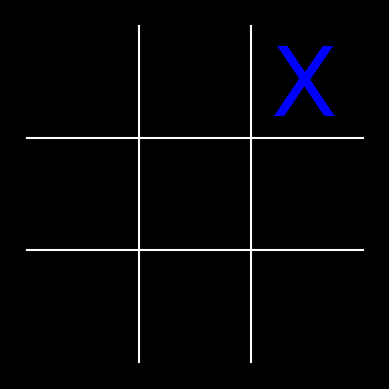

[[None None 1]
 [None None None]
 [None None 0]]



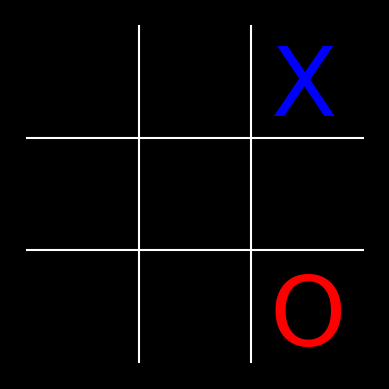

Minimax played: [0 0]

[[1 None 1]
 [None None None]
 [None None 0]]



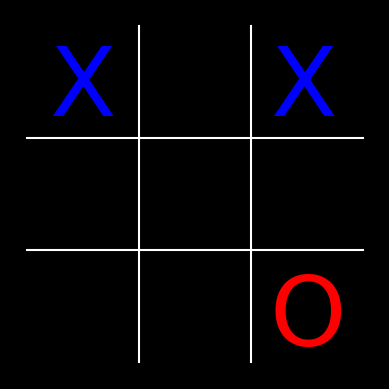

[[1 0 1]
 [None None None]
 [None None 0]]



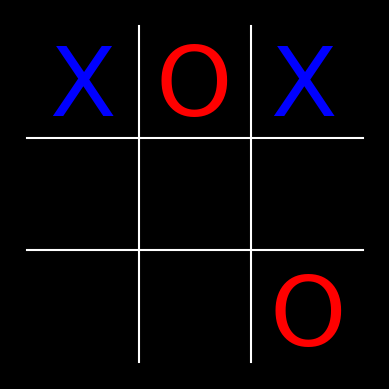

Minimax played: [2 0]

[[1 0 1]
 [None None None]
 [1 None 0]]



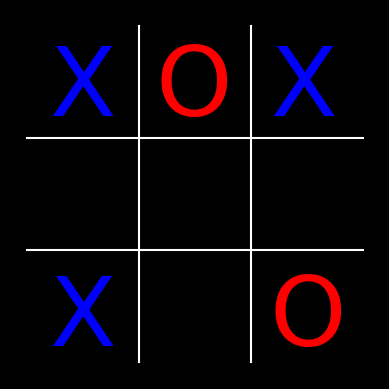

[[1 0 1]
 [None 0 None]
 [1 None 0]]



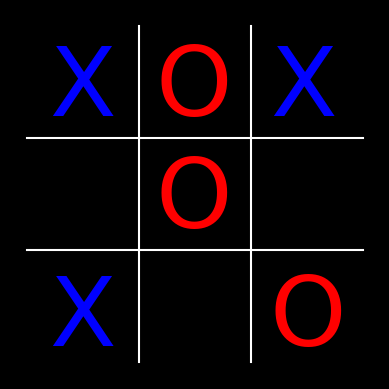

Minimax played: [1 0]

[[1 0 1]
 [1 0 None]
 [1 None 0]]



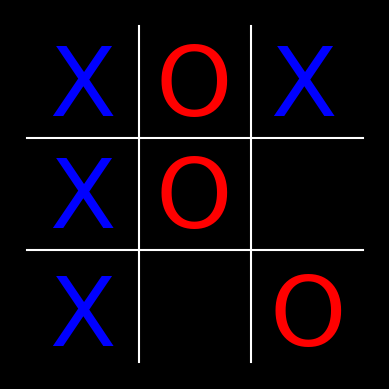

PLAYER X HAS WON!!


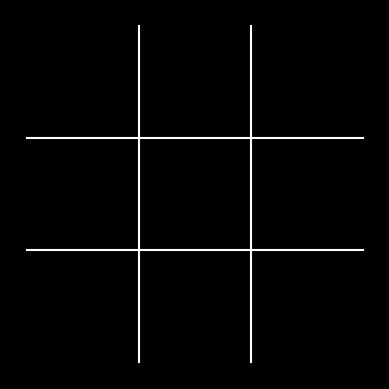

In [3]:
print("Welcome to Tic-Tac-Toe Game!!")
human_player = input("Select your Player X/O: ")
t = TicTacToe(GAME_DIMS)
x_player = HumanPlayer('X') if human_player == 'X' else SmartComputerPlayer('X')
o_player = HumanPlayer('O') if human_player == 'O' else SmartComputerPlayer('O')

play(t, x_player, o_player)